In [1]:
import importlib
import frengression
# importlib.reload(frengression)
from data_causl.utils import *
from data_causl.data import *
from frengression import *

device = torch.device('cpu')
from CausalEGM import *

import numpy as np
import jax.numpy as jnp
import pickle
import os
from tqdm import tqdm
import src.exp_utils as exp_utils

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import log_loss
from scipy.spatial.distance import pdist, squareform
import warnings

warnings.filterwarnings("ignore")


In [49]:
s, x,z,y= generate_data_survivl(n=10000,T=3)

In [50]:
s = torch.tensor(s, dtype=torch.float32)
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
z = torch.tensor(z, dtype=torch.float32)

In [53]:
model = FrengressionSeq(x_dim=1, y_dim=1, z_dim=1, T=3, s_dim = 1, noise_dim=1, num_layer=3, hidden_dim=100, device=device, x_binary = False)

In [54]:
model.train_xz(x=x, z=z, y=y, s=s, num_iters=6000, lr=1e-4, print_every_iter=1000)

Epoch 1: loss 2.7677, loss1 2.8696, loss2 0.2038
Epoch 1000: loss 1.7293, loss1 3.4616, loss2 3.4647
Epoch 2000: loss 1.7435, loss1 3.4584, loss2 3.4297
Epoch 3000: loss 1.7368, loss1 3.4571, loss2 3.4407
Epoch 4000: loss 1.7274, loss1 3.4444, loss2 3.4340
Epoch 5000: loss 1.7228, loss1 3.4491, loss2 3.4527
Epoch 6000: loss 1.7281, loss1 3.4668, loss2 3.4774


In [55]:
model.train_y(x=x,z=z,y=y,num_iters=10000, lr=1e-4, print_every_iter=1000)

Epoch 1: loss 5.9059,	loss_y 4.3775, 4.4029, 0.0507,	loss_eta 1.5284, 1.6114, 0.1660
Epoch 1000: loss 2.2123,	loss_y 1.0928, 2.1907, 2.1959,	loss_eta 1.1196, 2.2606, 2.2820
Epoch 2000: loss 2.2419,	loss_y 1.0986, 2.1904, 2.1836,	loss_eta 1.1433, 2.2676, 2.2486
Epoch 3000: loss 2.2231,	loss_y 1.0877, 2.1734, 2.1713,	loss_eta 1.1354, 2.2638, 2.2569
Epoch 4000: loss 2.2207,	loss_y 1.0883, 2.1710, 2.1655,	loss_eta 1.1324, 2.2537, 2.2426
Epoch 5000: loss 2.2147,	loss_y 1.0892, 2.1627, 2.1470,	loss_eta 1.1255, 2.2540, 2.2570
Epoch 6000: loss 2.2145,	loss_y 1.0778, 2.1469, 2.1382,	loss_eta 1.1367, 2.2604, 2.2472
Epoch 7000: loss 2.1739,	loss_y 1.0679, 2.1351, 2.1346,	loss_eta 1.1061, 2.2293, 2.2465
Epoch 8000: loss 2.1835,	loss_y 1.0686, 2.1216, 2.1061,	loss_eta 1.1149, 2.2381, 2.2464
Epoch 9000: loss 2.1883,	loss_y 1.0619, 2.1090, 2.0941,	loss_eta 1.1264, 2.2475, 2.2423
Epoch 10000: loss 2.1673,	loss_y 1.0465, 2.0939, 2.0948,	loss_eta 1.1207, 2.2410, 2.2405


In [56]:
x_try,z_try=model.sample_xz(s=s,x=x,z=z,y=y)

In [57]:
x_try

tensor([[ 0.6624, -0.6315, -0.4159],
        [-2.6059,  0.6625,  0.3461],
        [-0.4759,  0.3138, -0.1437],
        ...,
        [-1.1786, -0.6454, -1.7251],
        [-0.4315, -0.2931,  0.2621],
        [-0.6452,  0.3026,  0.5331]], grad_fn=<CatBackward0>)

In [58]:
eta_try= model.sample_eta(x=x,z=z)
y_try= model.sample_y(x=x,eta=eta_try)

In [59]:
eta_try

tensor([[ 1.4470,  0.6853,  1.9423],
        [-0.1184,  0.1060,  0.4276],
        [ 0.0931,  0.1035, -1.5425],
        ...,
        [ 1.0623,  1.0775, -0.9196],
        [-0.1724,  0.5815,  1.8954],
        [-0.9093, -0.0447, -0.6002]], grad_fn=<CatBackward0>)

In [60]:
y_try

tensor([[-3.2033,  1.3504,  3.9292],
        [-0.5067,  0.9626,  3.0071],
        [-0.1332,  0.6714, -3.8144],
        ...,
        [-1.1168,  2.6960, -0.8085],
        [-0.0720,  2.1041,  8.3606],
        [ 1.6499,  0.5708, -0.1802]], grad_fn=<CatBackward0>)

In [69]:
model.predict_causal(x=torch.tensor([1]), sample_size=5000)

[tensor([[1.4281]]), tensor([[0.5987]]), tensor([[0.4475]])]

In [66]:
result = model.sample_causal_margin(x=torch.tensor([1]), sample_size=200)[1]

(array([ 3.,  2.,  6., 26., 26., 30., 33., 52., 18.,  4.]),
 array([-14.1779232 , -11.72865772,  -9.27939224,  -6.83012676,
         -4.38086128,  -1.9315958 ,   0.51766968,   2.96693516,
          5.41620064,   7.86546612,  10.3147316 ]),
 <BarContainer object of 10 artists>)

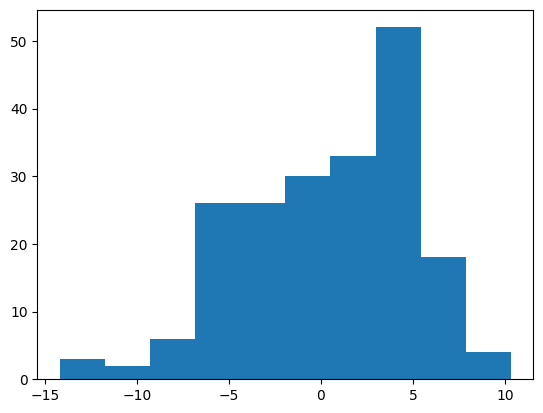

In [67]:
plt.hist(result.view(-1).numpy())